<a href="https://colab.research.google.com/github/rushipatelrr/Model/blob/main/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
trades = pd.read_csv("/content/historical_data.csv")
classify = pd.read_csv("/content/fear_greed_index.csv")

In [5]:
print("Historical_data", trades.shape)
print("Fear_Greed_Index", classify.shape)

Historical_data (18608, 16)
Fear_Greed_Index (2644, 4)


In [6]:
print(trades.info)

<bound method DataFrame.info of                                           Account   Coin  Execution Price  \
0      0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9769   
1      0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9800   
2      0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9855   
3      0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9874   
4      0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9894   
...                                           ...    ...              ...   
18603  0x430f09841d65beb3f27765503d0f850b8bce7713  LAYER           1.2102   
18604  0x430f09841d65beb3f27765503d0f850b8bce7713  LAYER           1.2098   
18605  0x430f09841d65beb3f27765503d0f850b8bce7713  LAYER           1.2096   
18606  0x430f09841d65beb3f27765503d0f850b8bce7713  LAYER           1.2090   
18607  0x430f09841d65beb3f27765503d0f850b8bce7713  LAYER           1.2080   

       Size Tokens  Size USD  Side     Time

In [7]:
print(classify.info)

<bound method DataFrame.info of        timestamp  value classification        date
0     1517463000     30           Fear  2018-02-01
1     1517549400     15   Extreme Fear  2018-02-02
2     1517635800     40           Fear  2018-02-03
3     1517722200     24   Extreme Fear  2018-02-04
4     1517808600     11   Extreme Fear  2018-02-05
...          ...    ...            ...         ...
2639  1745818200     54        Neutral  2025-04-28
2640  1745904600     60          Greed  2025-04-29
2641  1745991000     56          Greed  2025-04-30
2642  1746077400     53        Neutral  2025-05-01
2643  1746163800     67          Greed  2025-05-02

[2644 rows x 4 columns]>


In [8]:
print(trades.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          1
Transaction Hash    1
Order ID            1
Crossed             1
Fee                 1
Trade ID            1
Timestamp           1
dtype: int64


In [9]:
print(classify.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [12]:
trades["Timestamp"] = pd.to_datetime(trades["Timestamp"], unit="ms")
trades["Date"] = trades["Timestamp"].dt.date
classify["date"] = pd.to_datetime(classify["date"]).dt.date
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27


In [14]:
trades["is_profit"] = trades["Closed PnL"] > 0


In [15]:
trades["is_long"] = trades["Direction"].str.lower == "buy"
trades["is_short"] = trades["Direction"].str.lower == "sell"
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,is_profit,is_long,is_short
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,False,False,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,False,False,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,False,False,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,False,False,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,False,False,False


In [16]:
daily_trader = trades.groupby(["Account", "Date"]).agg(
    daily_pnl=("Closed PnL", "sum"),
    total_trades=("Closed PnL", "count"),
    win_rate=("is_profit", "mean"),
    avg_trade_size=("Size USD", "mean"),
    total_volume=("Size USD", "sum"),
    long_trades=("is_long", "sum"),
    short_trades=("is_short", "sum")
).reset_index()
daily_trader["long_short_ratio"] = (
    daily_trader["long_trades"] /
    (daily_trader["short_trades"] + 1)
)
daily_trader.head()

,Account,Date,daily_pnl,total_trades,win_rate,avg_trade_size,total_volume,long_trades,short_trades,long_short_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,0.025974,14810.891818,6842632.02,0,0,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,0.405542,16345.241940,54854631.95,0,0,0.0
2,0x430f09841d65beb3f27765503d0f850b8bce7713,2024-03-09,0.000000e+00,88,0.000000,1136.312727,99995.52,0,0,0.0
3,0x430f09841d65beb3f27765503d0f850b8bce7713,2024-07-03,1.455634e+05,249,0.951807,1759.953494,438228.42,0,0,0.0
4,0x430f09841d65beb3f27765503d0f850b8bce7713,2024-10-27,1.604505e+05,43,0.883721,6742.719767,289936.95,0,0,0.0


In [19]:
classify_renamed = classify.rename(columns={'date': 'Date'})
merged = daily_trader.merge(classify_renamed, on="Date", how="left")
print(merged.shape)
merged.head()

(15, 13)


,Account,Date,daily_pnl,total_trades,win_rate,avg_trade_size,total_volume,long_trades,short_trades,long_short_ratio,timestamp,value,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,0.025974,14810.891818,6842632.02,0,0,0.0,1.730007e+09,74.0,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,0.405542,16345.241940,54854631.95,0,0,0.0,1.739943e+09,44.0,Fear
2,0x430f09841d65beb3f27765503d0f850b8bce7713,2024-03-09,0.000000e+00,88,0.000000,1136.312727,99995.52,0,0,0.0,1.709962e+09,84.0,Extreme Greed
3,0x430f09841d65beb3f27765503d0f850b8bce7713,2024-07-03,1.455634e+05,249,0.951807,1759.953494,438228.42,0,0,0.0,1.719985e+09,50.0,Neutral
4,0x430f09841d65beb3f27765503d0f850b8bce7713,2024-10-27,1.604505e+05,43,0.883721,6742.719767,289936.95,0,0,0.0,1.730007e+09,74.0,Greed


In [21]:
performance_summary = merged.groupby("classification").agg(
    avg_pnl=("daily_pnl", "mean"),
    median_pnl=("daily_pnl", "median"),
    avg_win_rate=("win_rate", "mean"),
    pnl_std=("daily_pnl", "std"),
    avg_trades=("total_trades", "mean")
)
performance_summary

,avg_pnl,median_pnl,avg_win_rate,pnl_std,avg_trades
classification,,,,,
Extreme Greed,0.000000,0.000000,0.000000,NaN,88.0
Fear,540952.769397,341945.434741,0.350644,795825.600070,2086.8
Greed,-18878.457862,20925.513222,0.298193,183260.168001,267.4
Neutral,145563.448374,145563.448374,0.951807,NaN,249.0


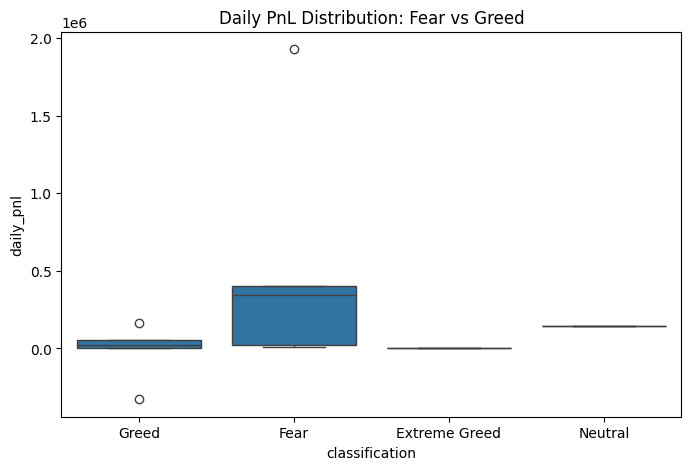

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x="classification", y="daily_pnl")
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.show()

In [24]:
behavior_summary = merged.groupby("classification").agg(
    avg_trade_size=("avg_trade_size", "mean"),
    avg_trades=("total_trades", "mean"),
    avg_long_short_ratio=("long_short_ratio", "mean")
)
behavior_summary

,avg_trade_size,avg_trades,avg_long_short_ratio
classification,,,
Extreme Greed,1136.312727,88.0,0.0
Fear,10876.392370,2086.8,0.0
Greed,6101.546010,267.4,0.0
Neutral,1759.953494,249.0,0.0


In [25]:
trader_activity = merged.groupby("Account")["total_trades"].sum().reset_index()
threshold = trader_activity["total_trades"].median()
trader_activity["segment"] = np.where(
    trader_activity["total_trades"] >= threshold,
    "High Frequency",
    "Low Frequency"
)
merged = merged.merge(
    trader_activity[["Account", "segment"]],
    on="Account",
    how="left"
)
merged.head()

,Account,Date,daily_pnl,total_trades,win_rate,avg_trade_size,total_volume,long_trades,short_trades,long_short_ratio,timestamp,value,classification,segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,0.025974,14810.891818,6842632.02,0,0,0.0,1.730007e+09,74.0,Greed,High Frequency
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,0.405542,16345.241940,54854631.95,0,0,0.0,1.739943e+09,44.0,Fear,High Frequency
2,0x430f09841d65beb3f27765503d0f850b8bce7713,2024-03-09,0.000000e+00,88,0.000000,1136.312727,99995.52,0,0,0.0,1.709962e+09,84.0,Extreme Greed,Low Frequency
3,0x430f09841d65beb3f27765503d0f850b8bce7713,2024-07-03,1.455634e+05,249,0.951807,1759.953494,438228.42,0,0,0.0,1.719985e+09,50.0,Neutral,Low Frequency
4,0x430f09841d65beb3f27765503d0f850b8bce7713,2024-10-27,1.604505e+05,43,0.883721,6742.719767,289936.95,0,0,0.0,1.730007e+09,74.0,Greed,Low Frequency


In [ ]:
segment_analysis = merged.groupby(["segment", "classification"]).agg(
    avg_pnl=("daily_pnl", "mean"),
    avg_win_rate=("win_rate", "mean"),
    avg_trades=("total_trades", "mean")
).reset_index()
segment_analysis

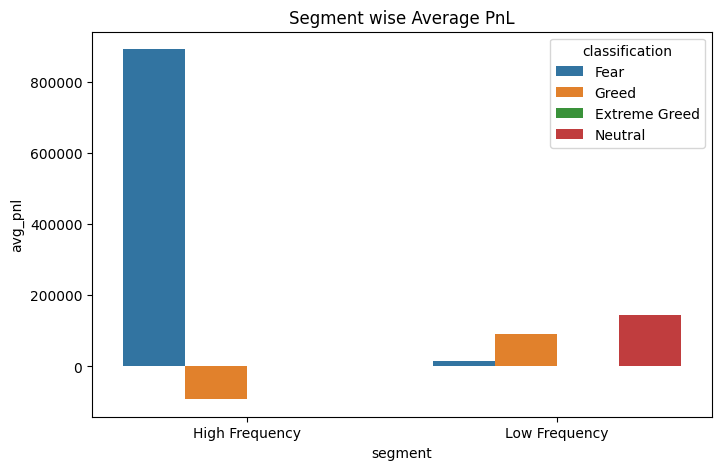

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=segment_analysis,
    x="segment",
    y="avg_pnl",
    hue="classification"
)
plt.title("Segment wise Average PnL")
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
merged["profitable_day"] = merged["daily_pnl"] > 0
merged["sentiment_binary"] = np.where(
    merged["classification"] == "Greed", 1, 0
)
features = ["total_trades", "avg_trade_size", "long_short_ratio", "sentiment_binary"]
X = merged[features]
y = merged["profitable_day"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         1
        True       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

